# **Домашнее задание 2**

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [2]:
import numpy as np
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

In [3]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
# Normalize the images.
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
train_images.shape

(60000, 784)

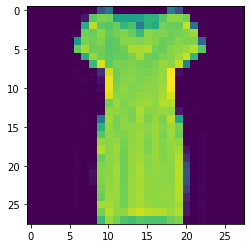

In [6]:
plt.imshow(train_imagesi[20,:,:])
plt.show()

In [7]:
model = Sequential(name='my_model')
model.add(Dense(128, activation='relu', input_shape=(784,)))

model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [9]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
# Train the model.
model.fit(  
  train_images,
  y_t,
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5]) 

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3050 - accuracy: 0.8874 - val_loss: 0.3382 - val_accuracy: 0.8792
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.8908 - val_loss: 0.3513 - val_accuracy: 0.8741
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.8971 - val_loss: 0.3606 - val_accuracy: 0.8751
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9003 - val_loss: 0.3291 - val_accuracy: 0.8799
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.8730
[9 2 1 1 6]
[9 2 1 1 6]


**числа нейронов в слое(для 2-хслойной сети)**

In [13]:
results_neurons =  {
    'neurons': [],
    'accuracy_tr': [],
    'accuracy_val': []
    }

In [15]:

n = [2, 10, 50, 100, 150, 300, 700]

for r in range(11):
  for i in n:

    model = Sequential(name='my_model')
    model.add(Dense(i, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
    
    
    hh = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5,
    batch_size=32, validation_split=0.2, verbose = 0
    )

    model.evaluate(
    test_images,
    to_categorical(test_labels)
    ) 

    results_neurons['neurons'].append(i)
    results_neurons['accuracy_tr'].append(hh.history['accuracy'][-1])
    results_neurons['accuracy_val'].append(hh.history['val_accuracy'][-1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8672


In [16]:
results_neurons = pd.DataFrame(data=results_neurons)

In [21]:
results_neurons.head()

,neurons,accuracy_tr,accuracy_val
0,2,0.640104,0.638750
1,10,0.854167,0.848083
2,50,0.881229,0.875250
3,100,0.884917,0.871500
4,150,0.887750,0.869333


In [18]:
results_neurons.groupby('neurons').mean()[['accuracy_tr']]

,accuracy_tr
neurons,
2,0.605500
10,0.850078
50,0.880335
100,0.885854
150,0.888119
300,0.890468
700,0.891136


In [19]:
results_neurons.groupby('neurons').mean()[['accuracy_val']]

,accuracy_val
neurons,
2,0.610886
10,0.842341
50,0.869167
100,0.873136
150,0.873939
300,0.873621
700,0.876492


**числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров)**

In [25]:
results_layers =  {
    'layers': [],
    'accuracy_tr': [],
    'accuracy_val': []
    }

In [26]:
#2 слоя


for i in range (11):
  model = Sequential([
    Dense(100, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
  ])

  model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  hh = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  model.evaluate(
  test_images,
  to_categorical(test_labels)
  ) 

  results_layers['layers'].append(2)
  results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 2ms/step - loss: 0.4075 - accuracy: 0.8555
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_181 (Dense)            (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
#3

for i in range(11):
  model = Sequential([
    Dense(90, activation='relu', input_shape=(784,)),
    Dense(90, activation='relu'),
    Dense(10, activation='softmax'),
  ])

  model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  hh = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  model.evaluate(
  test_images,
  to_categorical(test_labels)
  ) 

  results_layers['layers'].append(3)
  results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 2ms/step - loss: 0.3601 - accuracy: 0.8732
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 90)                70650     
_________________________________________________________________
dense_213 (Dense)            (None, 90)                8190      
_________________________________________________________________
dense_214 (Dense)            (None, 10)                910       
Total params: 79,750
Trainable params: 79,750
Non-trainable params: 0
_________________________________________________________________


In [28]:
#5

for i in range(11):
  model = Sequential([
    Dense(80, activation='relu', input_shape=(784,)),
    Dense(80, activation='relu'),
    Dense(80, activation='relu'),
    Dense(80, activation='relu'),
    Dense(10, activation='softmax'),
  ])

  model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  hh = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  model.evaluate(
  test_images,
  to_categorical(test_labels)
  ) 

  results_layers['layers'].append(5)
  results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8651
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_265 (Dense)            (None, 80)                62800     
_________________________________________________________________
dense_266 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_267 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_268 (Dense)            (None, 80)                6480      
_________________________________________________________________
dense_269 (Dense)            (None, 10)                810       
Total params: 83,050
Trainable params: 83,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
#10

for i in range(11):
  model = Sequential([
    Dense(60, activation='relu', input_shape=(784,)),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(60, activation='relu'),
    Dense(10, activation='softmax'),
  ])

  model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  hh = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  model.evaluate(
  test_images,
  to_categorical(test_labels)
  ) 

  results_layers['layers'].append(10)
  results_layers['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_layers['accuracy_val'].append(hh.history['val_accuracy'][-1])


model.summary()

313/313 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8574
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_370 (Dense)            (None, 60)                47100     
_________________________________________________________________
dense_371 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_372 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_373 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_374 (Dense)            (None, 60)                3660      
_________________________________________________________________
dense_375 (Dense)            (None, 60)                3660      
______________________________

In [30]:
results_layers = pd.DataFrame(data=results_layers)

In [31]:
results_layers.head()

,layers,accuracy_tr,accuracy_val
0,2,0.885646,0.862833
1,2,0.884292,0.863167
2,2,0.886771,0.878750
3,2,0.885979,0.875250
4,2,0.886625,0.878167


In [33]:
results_layers.groupby('layers').mean()[['accuracy_tr']]

,accuracy_tr
layers,
2,0.886066
3,0.885828
5,0.882598
10,0.871167


In [34]:
results_layers.groupby('layers').mean()[['accuracy_val']]

,accuracy_val
layers,
2,0.871424
3,0.873591
5,0.871856
10,0.862742


**Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.**

In [35]:
results_optim =  {
    'optim': [],
    'accuracy_tr': [],
    'accuracy_val': []
    }

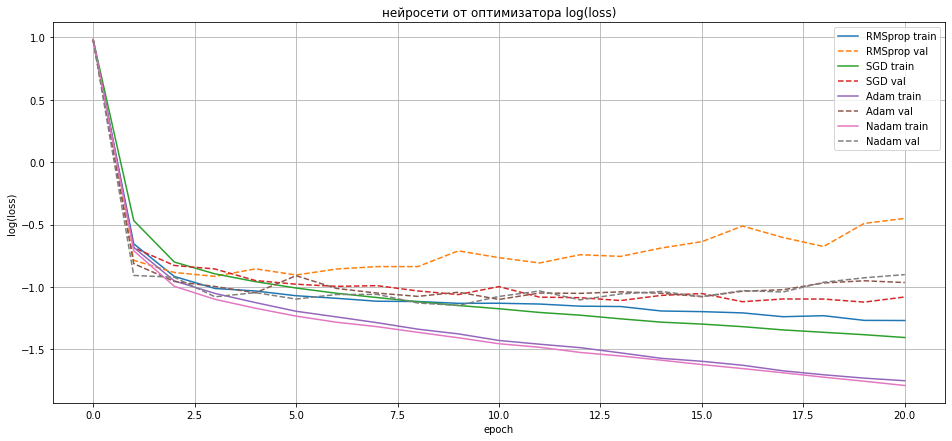

In [42]:
# создаем модель model
model = Sequential([
  Dense(90, activation='relu', input_shape=(784,)),
  Dense(90, activation='relu'),
  Dense(10, activation='softmax'),
])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 20
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
    Dense(90, activation='relu', input_shape=(784,)),
    Dense(90, activation='relu'),
    Dense(10, activation='softmax'),
  ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  results_optim['optim'].append(i_optim)
  results_optim['accuracy_tr'].append(hh.history['accuracy'][-1])
  results_optim['accuracy_val'].append(hh.history['val_accuracy'][-1])

  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')


plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [44]:
results_optim = pd.DataFrame(data=results_optim).sort_values('accuracy_val', ascending=False)

In [45]:
results_optim.head()

,optim,accuracy_tr,accuracy_val
7,<tensorflow.python.keras.optimizer_v2.nadam.Na...,0.935458,0.890500
19,<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.933771,0.888833
10,<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.935458,0.887917
15,<tensorflow.python.keras.optimizer_v2.nadam.Na...,0.936437,0.886833
20,<tensorflow.python.keras.optimizer_v2.nadam.Na...,0.934667,0.885750


**Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?**

Начали мы с бэйзлайна при числе нейронов в 128 и количестве слоев = 2. Промежуточный набор параметров со средним результатом 0.873591 оказался таким: нейронов = 90, слоев = 3, оптимизация = adam. На последнем шаге мы просмотрели варианты оптимизации + увеличели количество эпох и получили максимальный результат на тесте 0.890500. На улучшение результата повлиял оптимизатор и увеличение количества эпох. 

**Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)**

In [46]:
model = Sequential([
  Dense(90, activation='relu', input_shape=(784,)),
  Dense(90, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
optimizer='Nadam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)

model.fit(
train_images,
to_categorical(train_labels),
epochs=20,
batch_size=32, validation_split=0.2, verbose = 0
)

model.evaluate(
test_images,
to_categorical(test_labels)
) 

313/313 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8769


[0.41999033093452454, 0.8769000172615051]

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

In [51]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [52]:
y_pred = np.argmax(probability_model.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [53]:
CM = confusion_matrix(test_labels,y_pred)
print(CM)

[[828   3  19  29   3   0 110   0   8   0]
 [  1 969   2  24   2   0   1   0   1   0]
 [ 24   1 790  16 101   0  65   0   3   0]
 [ 23  11  10 920  19   0  12   0   5   0]
 [  0   0  83  41 843   0  30   0   3   0]
 [  0   0   0   0   0 950   0  23  10  17]
 [123   1  84  37 121   0 622   0  12   0]
 [  0   0   0   0   0  18   0 931   8  43]
 [ 11   1   1   5   4   2   8   1 967   0]
 [  1   0   0   0   0  10   0  40   0 949]]
